# Задание 2

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
credit_data = pd.read_csv('german.data', header=None, sep=' ')
X = credit_data.as_matrix(range(24))
y = np.asarray(credit_data[24])

credit_data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


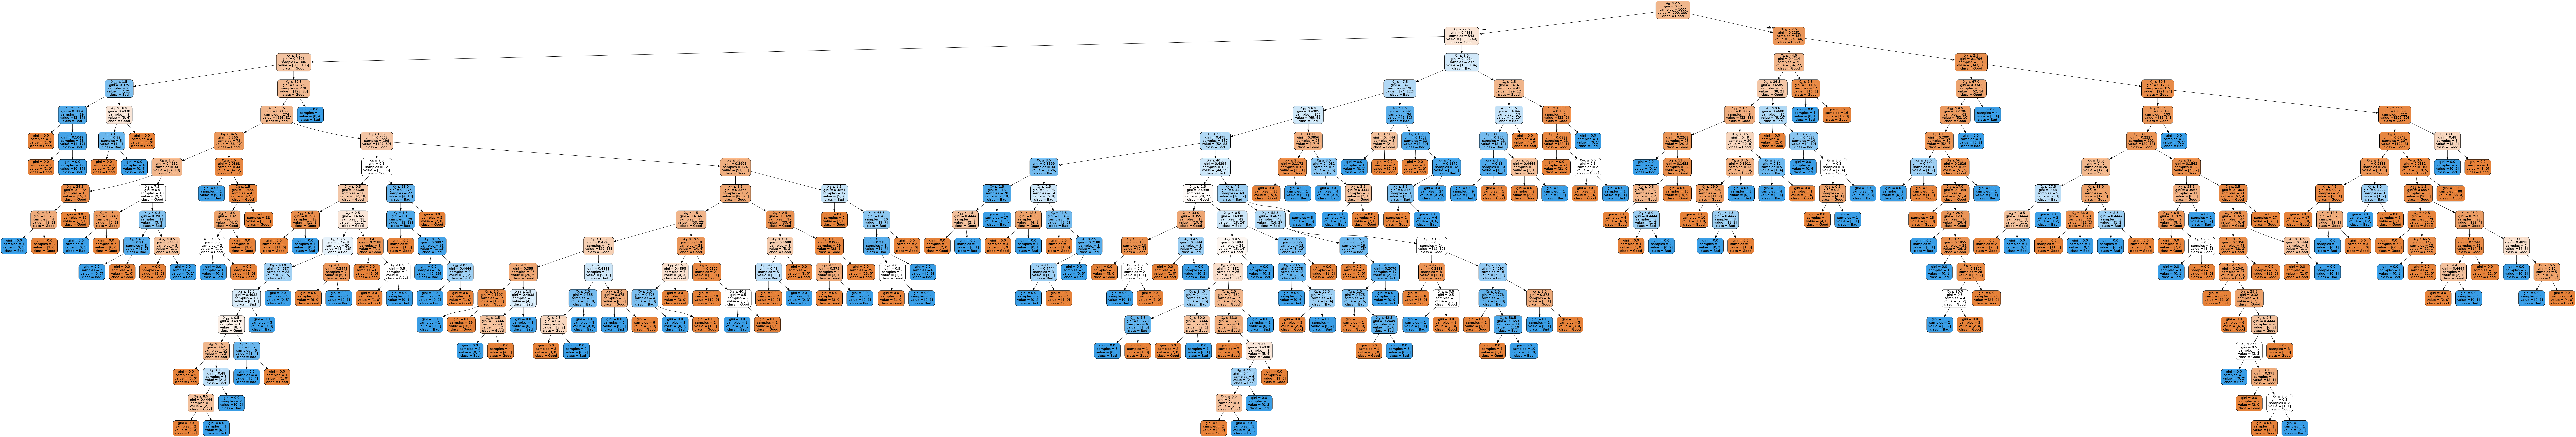

In [3]:
from IPython.display import Image
from sklearn import tree
import pydotplus

model = tree.DecisionTreeClassifier()
model.fit(X, y)

dot_data = tree.export_graphviz(model, out_file="tree.out", class_names=['Good', 'Bad'],
    filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())  

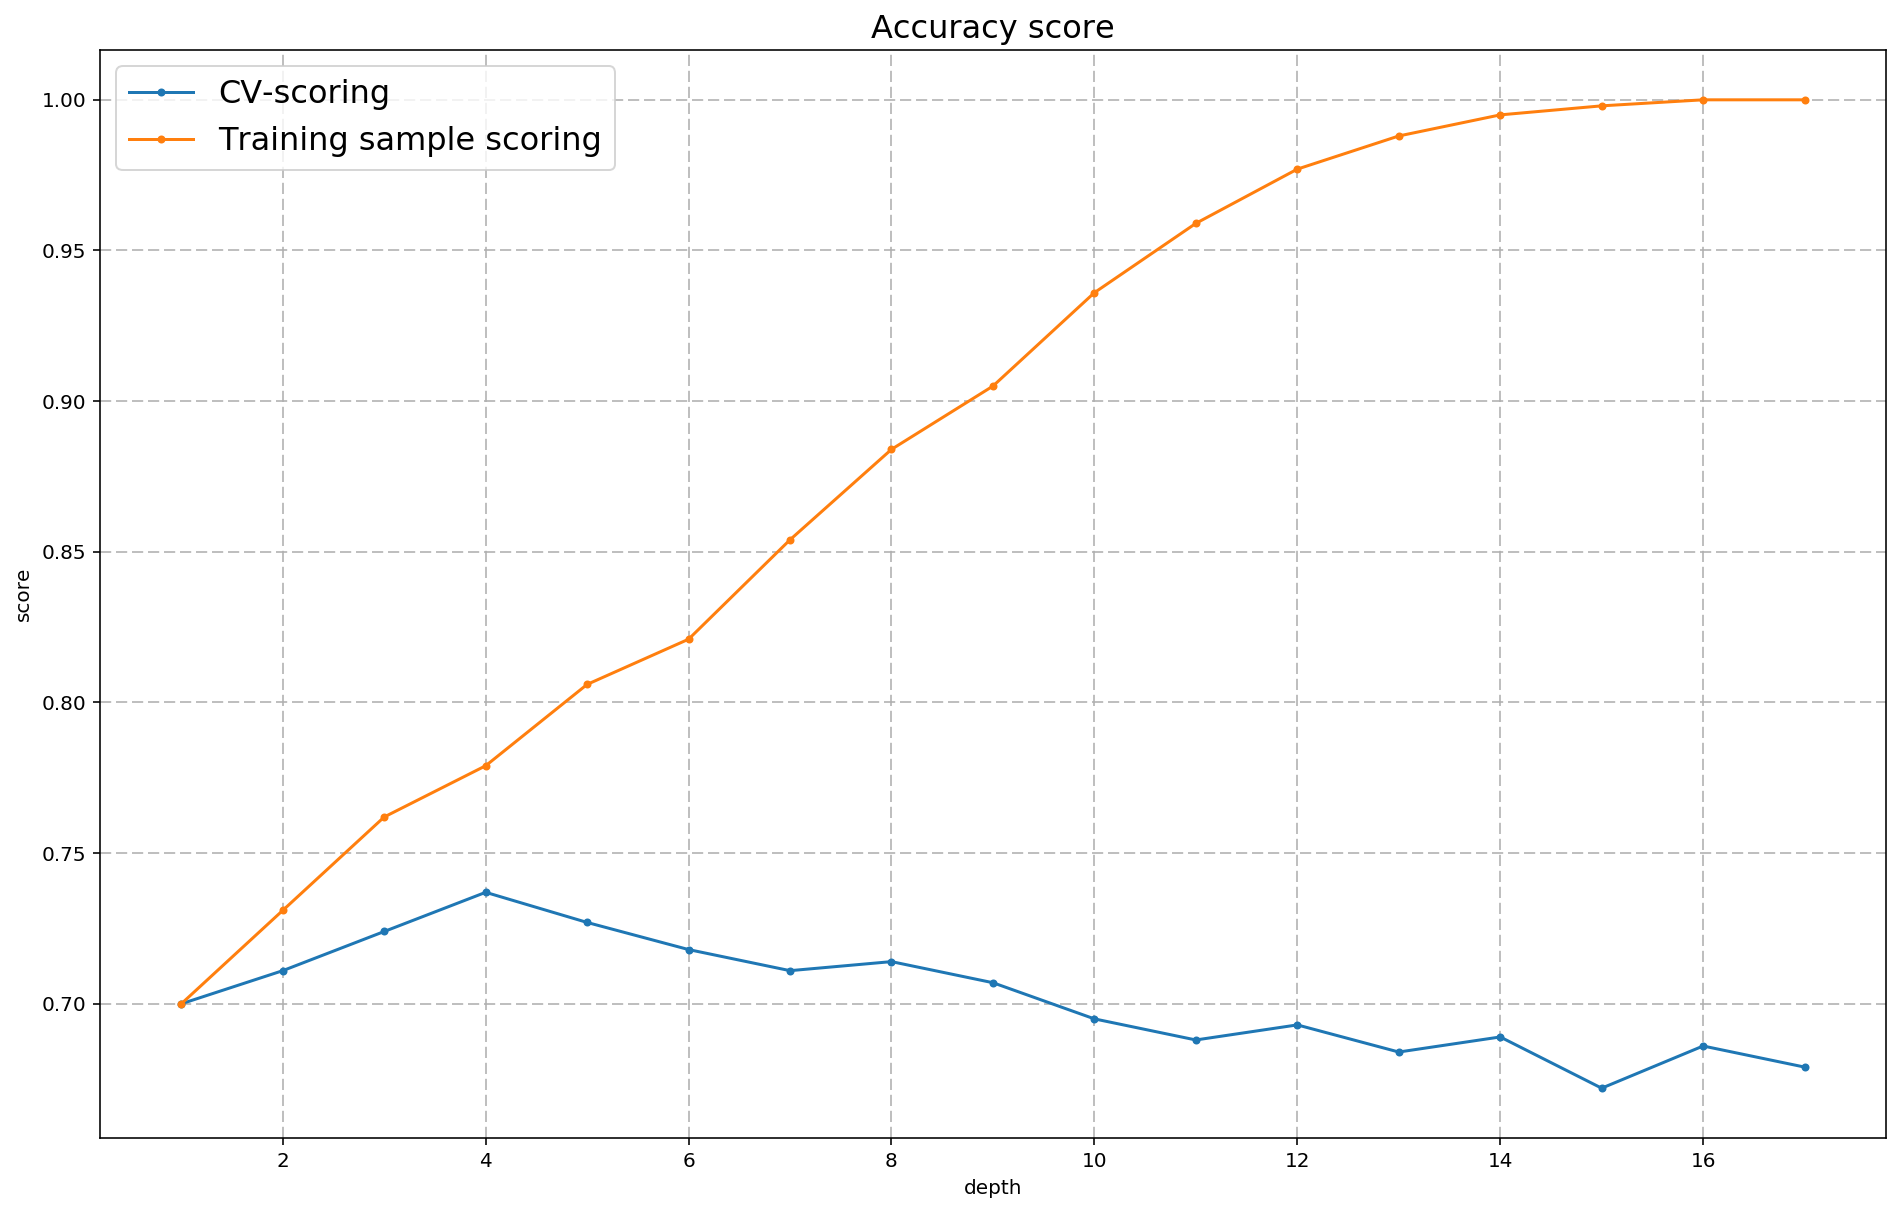

In [6]:
from sklearn import cross_validation, metrics

MAX_DEPTH = 18

tree_depths = range(1, MAX_DEPTH)

cv_scoring = []
for n in tree_depths:
    model = tree.DecisionTreeClassifier(max_depth=n)
    score = cross_validation.cross_val_score(model, X, y, scoring='accuracy', cv=5)
    cv_scoring.append(np.mean(score))

training_sample_scoring = []
for n in tree_depths:
    model = tree.DecisionTreeClassifier(max_depth=n)
    model.fit(X, y)
    score = metrics.accuracy_score(model.predict(X), y)
    training_sample_scoring.append(score)


plt.figure(figsize=(16, 10))
plt.plot(tree_depths, cv_scoring, marker='.', label='CV-scoring')
plt.plot(tree_depths, training_sample_scoring, marker='.', label='Training sample scoring')
plt.grid(linestyle='--')
plt.xlabel('depth')
plt.ylabel('score')
plt.title('Accuracy score', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Заметим, что с увеличение глубины дерево все больше переобучается на тренировочной выборке. Поэтому видим, что наилучший результат на кросс-валидации достигается при глубине 4 и после это точность лишь ухудшается.

Рассмотрим этот случай отдельно и попробуем проинтерпретировать признаки, по которым происходит разбиение:

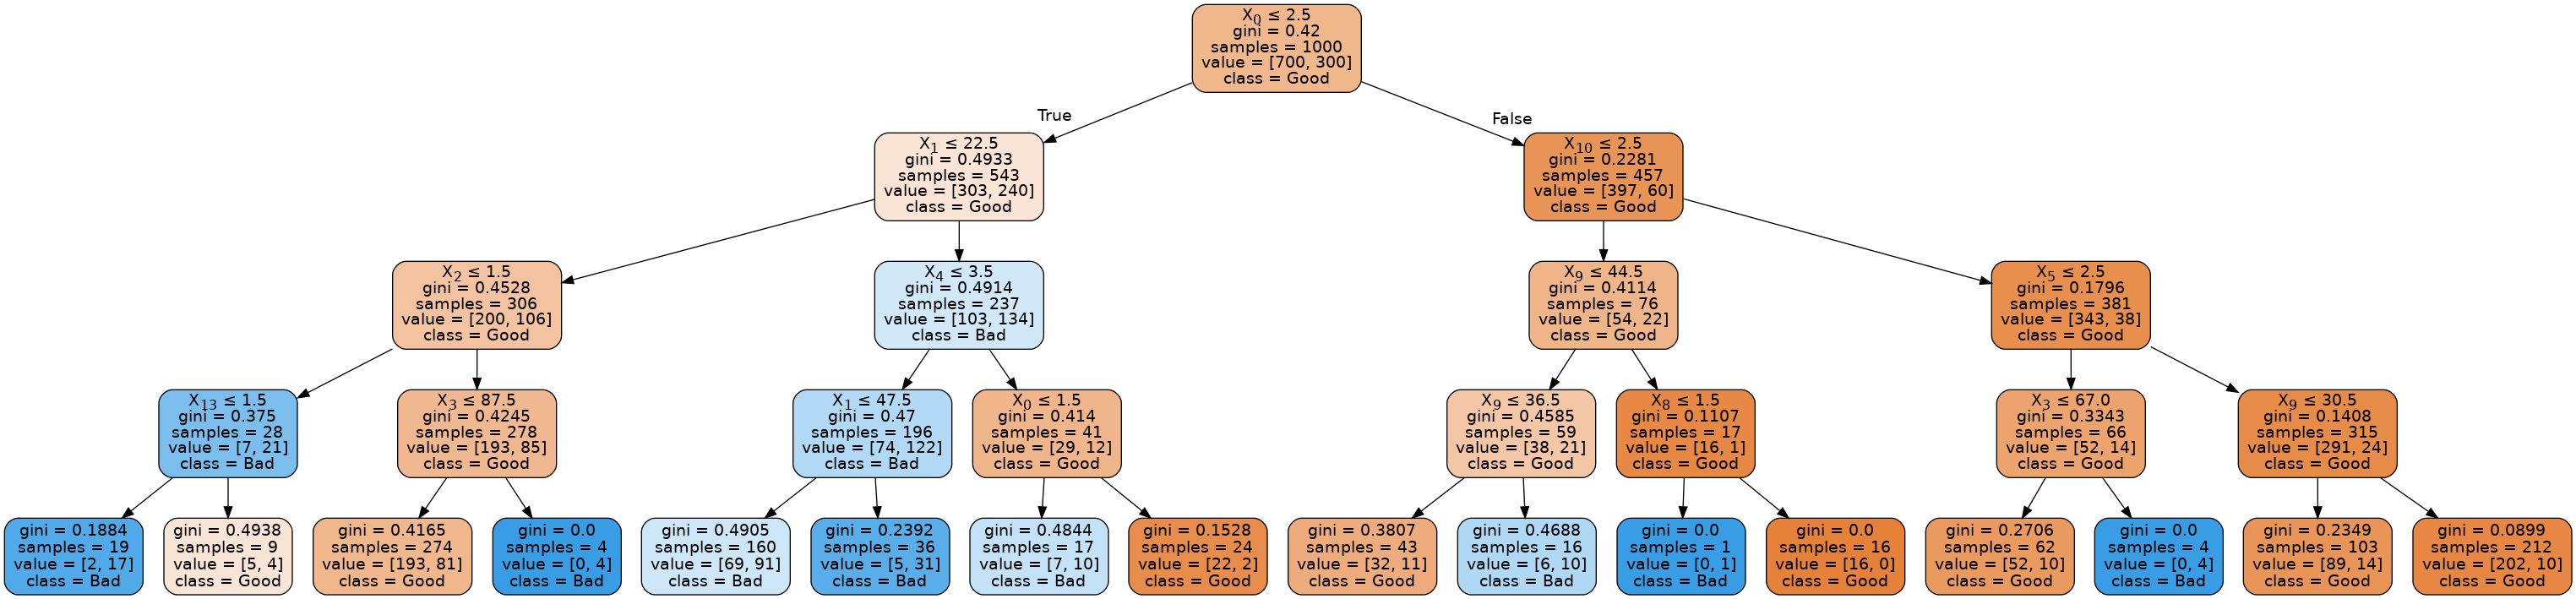

In [7]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(X, y)

dot_data = tree.export_graphviz(model, out_file="tree_depth_4.out", class_names=['Good', 'Bad'],
                                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("tree_depth_4.out")  
Image(graph.create_png())  

Как видим, положительный результат обычно дает правое поддерево. Это объясняется тем, что наиболее кредитоспособным клиентам соответствуют признаки с более высокой числовой характеристикой. Например, тому что X_0 > 2.5 соответствует большое количество денег на счету клиента.